# Download the data set 

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
# copy the dataset to working directory
! cp -r /kaggle/input/spam-mails-dataset .

In [ ]:
# essential imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for pattern matching 
import re

# for model training
from sklearn.model_selection import train_test_split

# for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# vectorizer for extract features from the text
from sklearn.feature_extraction.text import TfidfVectorizer

# pipeline for sequential process
from sklearn.pipeline import Pipeline

# models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# download the essential librarys
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# load the dataset  

In [ ]:
df = pd.read_csv('spam_ham_dataset.csv', index_col='Unnamed: 0')
df = df.drop('label', axis=1)

# Eliminate the unnessesry columns
df.columns = ['text', 'label'] 
df.head()

,text,label
605,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,"Subject: photoshop , windows , office . cheap ...",1
2030,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
def clear_text(text):
    text = text.lower()                         # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)        # keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()    # normalize whitespace

    tokens = word_tokenize(text)                # covert the text into tokens
    stop_words = set(stopwords.words('english')) # load the stopwords ('a' , 'an' , 'i' 'is')
    tokens = [word for word in tokens if word not in stop_words] # eliminate the stopwords

    lemmatizer = WordNetLemmatizer()             # initialize the lemmatizer
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # convert the word ('reading' -> 'read')

    return ' '.join(tokens)  # covert the tokens back to string

df['text'] = df['text'].map(clear_text)
df.head()


,text,label
605,subject enron methanol meter follow note gave ...,0
2349,subject hpl nom january see attached file hpln...,0
3624,subject neon retreat ho ho ho around wonderful...,0
4685,subject photoshop window office cheap main tre...,1
2030,subject indian spring deal book teco pvr reven...,0


# plot the distribution 

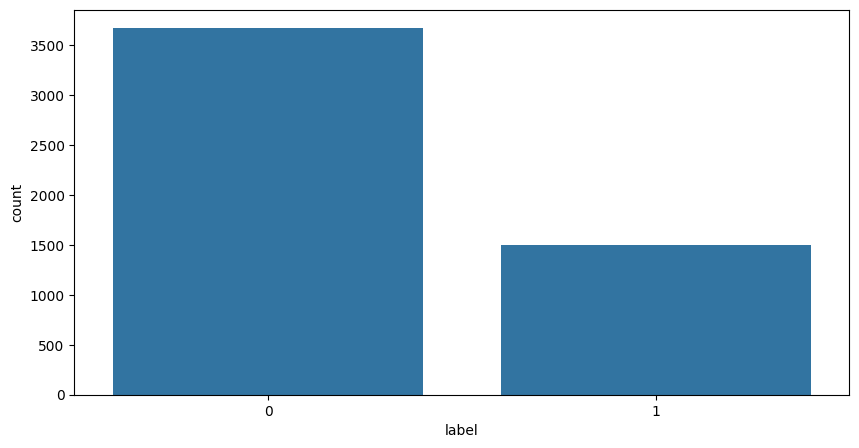

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.show()

# Model Defination  

In [ ]:

"""
Model architecture

PipeLine(
    -> vectorizer ("convert the words form the word vectors like similar words leads to same meaning ")
            eg: 
                bank , money -> leads to same vector

    -> classifier ("classifies the class based on the vector computation")
)
"""
# RandomForest
rf_model = Pipeline(
    [
        ('tfidf', TfidfVectorizer()),
        ('rf', RandomForestClassifier())
    ]
)

# SVM
svm_model = Pipeline(
    [
        ('tfidf', TfidfVectorizer()),
        ('svm', SVC())
    ]
)

# navie bayers
nb_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# train test Split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape # print the sizes of the splits

((4136,), (1035,), (4136,), (1035,))

# Train + Evaluate Function 

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.98      0.97       293

    accuracy                           0.99      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.99      0.99      0.99      1035



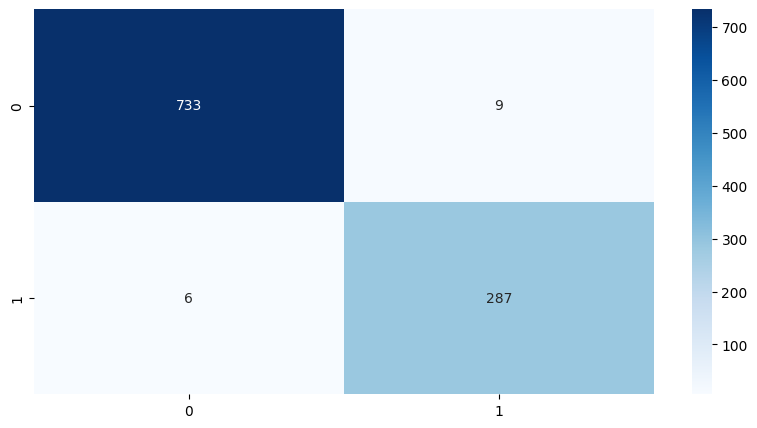

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC())])
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



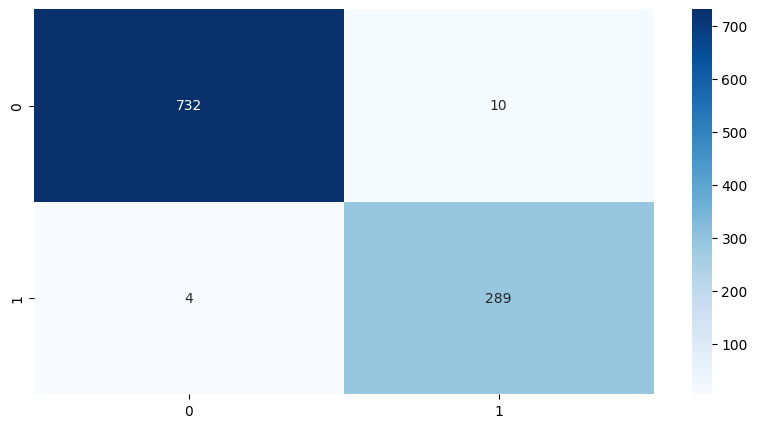

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       742
           1       1.00      0.74      0.85       293

    accuracy                           0.93      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.93      0.92      1035



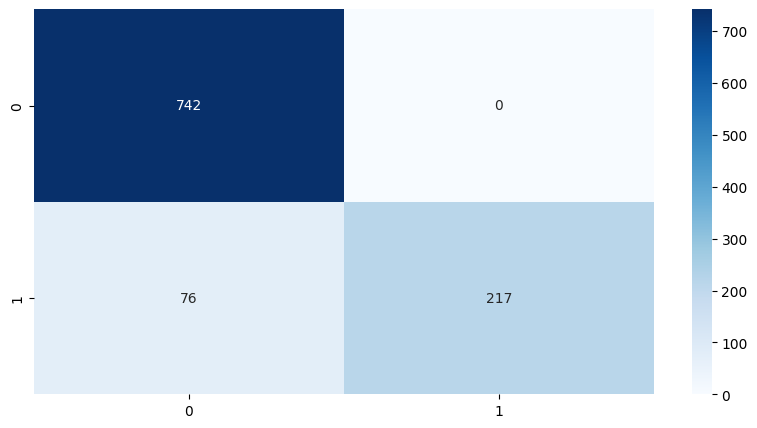

In [ ]:
def train_and_evaluate(model, train_x, train_y, test_x, test_y):
    # train the model
    model.fit(train_x, train_y)

    # predict the test values
    pred = model.predict(test_x)

    # print the classification report ('accuracy' , 'precision', 'recall')
    print(classification_report(test_y, pred))

    # plot the scores
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(test_y, pred), annot=True, fmt='g', cmap='Blues')
    plt.show()

# pass the models to the function
for model in [rf_model, svm_model, nb_model]:
    print(model)
    train_and_evaluate(model, train_x, train_y, test_x, test_y)

# Custom Evaluatoin 

In [ ]:
text = """
    Dear sir, 
    i am a policy marker i have a offer of one core dollar to you please click the link to avail the offer
"""


text = clear_text(text)

for model in [rf_model, svm_model, nb_model]:

    pred = model.predict([text])

    print(f" Model : {model} \n", "Spam" if pred==1 else 'Ham')

NameError: name 'clear_text' is not defined